In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Proyecto_Final/Proyecto_Final
!ls

Mounted at /content/drive
/content/drive/MyDrive/Proyecto_Final/Proyecto_Final
ColabTrain.ipynb	    GMA			   README.md
dataset2		    GUI.py		   removeWarped.py
disc-conv.pth		    libraries.md	   warp.py
evaluacionResultados.ipynb  NN_resorces		   weights
gen-conv.pth		    process_video.py
generateWarped.py	    pruebaPrecision.ipynb


In [ ]:
!python NN_resorces/trainGAN.py

0
1
2
3
4
5
6
7
8
9


In [ ]:
import torch.nn as nn
import torch.cuda as cuda
import torch.optim as optim
import cv2
from os.path import exists
import matplotlib.pyplot as plt
from torch import cat, no_grad, load
from NN_resorces.Dataset import Dataset
from NN_resorces.UNET import UNET
from torch.utils.data import DataLoader
import torchvision.transforms as transforms 
BATCH = 4
device = "cuda" if cuda.is_available() else "cpu"
dir_dataset = '/content/drive/MyDrive/Proyecto_Final/Proyecto_Final/dataset2'
gen = UNET(in_channels=6,channels=[64, 128, 256, 512]).to("cuda")
if(exists("./weights/gen-conv.pth")):
  print("weights loaded")
  gen.load_state_dict(load('./weights/gen-conv.pth'))
trainset = Dataset(dir = dir_dataset, transform=transforms.ToTensor())
train_loader = DataLoader(trainset, batch_size=1, shuffle=True)

weights loaded


In [ ]:
for data in train_loader:
  (F1,F2,F3) = data 
  F1 = F1.to(device)
  F2 = F2.to(device)
  F3 = F3.to(device)
  # Train Discriminator
  with no_grad():
    input = cat([F1, F3], dim=1)
    output = gen(input).cpu().detach().numpy()[0].transpose(1,2,0)
  img1 = F1.cpu().numpy()[0].transpose(1,2,0)
  img2 = F2.cpu().numpy()[0].transpose(1,2,0)
  img3 = F3.cpu().numpy()[0].transpose(1,2,0)
  del F1,F2,F3
  generated = output
  break

Text(0.5, 1.0, 'generated')

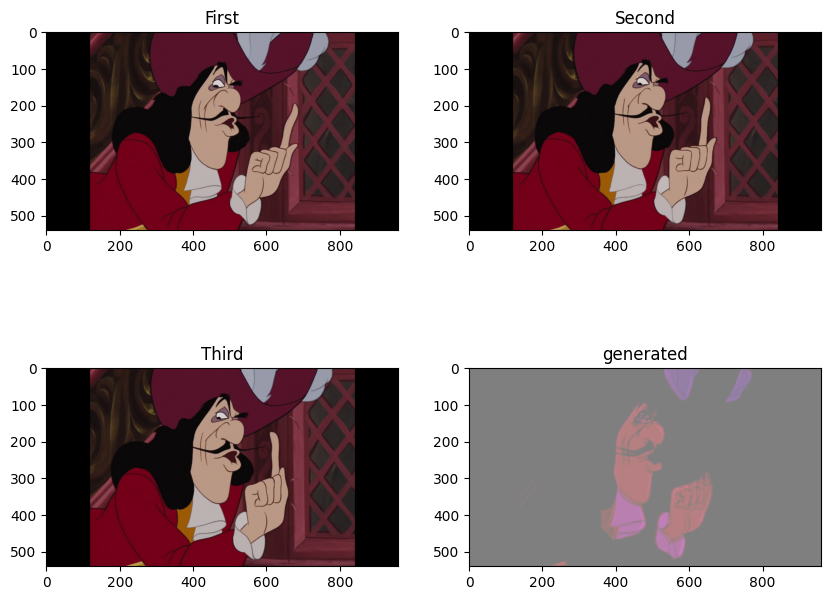

In [ ]:
fNew = cv2.cvtColor(generated, cv2.COLOR_BGR2RGB)
f1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
f2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
f3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(2, 2, 1) 
plt.imshow(f1)
plt.title("First")
fig.add_subplot(2, 2, 2)
plt.imshow(f2)
plt.title("Second")
fig.add_subplot(2, 2, 3)
plt.imshow(f3)
plt.title("Third")
fig.add_subplot(2, 2, 4)
plt.imshow(fNew)
plt.title("generated")